In [14]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

import warnings
warnings.simplefilter("ignore")

from scipy.stats import kstest, spearmanr, mannwhitneyu, ttest_ind, levene, kruskal, pearsonr

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error 
import statsmodels.api as sm

In [2]:
data = pd.read_csv('ready_data.csv',index_col=0)

In [3]:
data.head()

,price_per_square,squares,free,current_floor,max_floor,latitude,longitude,Devyatkino,Grazhdanskii prospekt,Akademicheskaya,...,Ploshchad Aleksandra Nevskogo-1,Elizarovskaia,Lomonosovskaia,Proletarskaia,Obukhovo,Rybackoe,metro_1km,metro_5km,metro_10km,parkings_1km
0,311480.0,131.63,0,1,2,30.082621,59.724677,42.18,39.32,36.65,...,34.54,38.56,40.41,43.51,42.04,46.67,0,0,0,47.0
1,254997.0,145.10,0,1,5,30.316138,59.911854,16.08,13.22,10.44,...,7.71,12.00,14.10,17.35,16.16,21.02,6,33,56,55.0
2,353742.0,73.50,0,1,7,30.301127,59.912368,17.50,14.62,11.85,...,9.38,13.67,15.75,19.00,17.79,22.65,1,27,55,55.0
3,190000.0,33.90,0,1,9,30.449978,59.956836,5.93,5.97,6.88,...,7.46,4.74,5.08,6.30,6.92,9.97,0,5,21,15.0
4,166667.0,89.40,0,1,5,30.325543,59.926372,14.80,11.94,9.16,...,6.64,11.05,13.21,16.49,15.37,20.24,8,34,57,26.0


In [4]:
data = data[['price_per_square', 'squares', 'free', 'current_floor', 'max_floor',
       'latitude', 'longitude','Nevskii prospekt','metro_1km','parkings_1km']]

In [5]:
data = data[data['price_per_square']>= 30000.0]

In [6]:
Q1 = data['price_per_square'].quantile(0.05)
Q3 = data['price_per_square'].quantile(0.95)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['price_per_square'] >= lower_bound) & (data['price_per_square'] <= upper_bound)]

# Строим Лес

In [8]:
df_1 = data.copy()

In [9]:
X = df_1[['squares', 'free', 'current_floor', 'max_floor',
       'latitude', 'longitude', 'Nevskii prospekt', 'metro_1km',
       'parkings_1km']]
y = df_1['price_per_square']

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state = 999)

In [36]:
from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(X_train, y_train)
display(rfc.score(X_train, y_train))

0.9065256726008901

In [37]:
predictions1 = rfc.predict(X_train)
#Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_train, predictions1))
print(rmse)
print(mean_absolute_error(y_train, predictions1))
print(mean_absolute_percentage_error(y_train, predictions1))

33713.46404782952
24439.91889952153
0.13775236849218928


In [38]:
predictions2 = rfc.predict(X_test)
#Calculate the root mean squared error
display(rfc.score(X_test, y_test))
rmse = np.sqrt(mean_squared_error(y_test, predictions2))
print(rmse)
print(mean_absolute_error(y_test, predictions2))
print(mean_absolute_percentage_error(y_test, predictions2))

0.1962666373850006

108127.54989237415
75833.59940334129
0.38114940562366056


# Настроим параметры

In [31]:
from sklearn.model_selection import GridSearchCV

## Defining param grid 
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300, 350],
    'max_depth': [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]
}

## Creating a random forest regressor object
rf_regressor = RandomForestRegressor(random_state=999)
# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Getting the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (MSE):", best_score)

Best Parameters: {'max_depth': 22, 'n_estimators': 200}
Best Score (MSE): 10963793436.612562


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 999)

from sklearn.ensemble import RandomForestRegressor

rfc1 = RandomForestRegressor(n_estimators=200,max_depth=22)
rfc1.fit(X_train, y_train)
display(rfc1.score(X_train, y_train))

0.9071425204517818

In [53]:
predictions3 = rfc1.predict(X_train)
#Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_train, predictions3))
print(rmse)
print(mean_absolute_error(y_train, predictions3))
print(mean_absolute_percentage_error(y_train, predictions3))

35080.85945386675
22538.079561874532
0.12234005857808057


In [54]:
predictions4 = rfc1.predict(X_test)
#Calculate the root mean squared error
display(rfc1.score(X_test, y_test))
rmse = np.sqrt(mean_squared_error(y_test, predictions4))
print(rmse)
print(mean_absolute_error(y_test, predictions4))
print(mean_absolute_percentage_error(y_test, predictions4))

0.30823556157811804

105003.13253166109
71630.71132669068
0.36121024487524356


In [55]:
predictions5 = rfc1.predict(X)
#Calculate the root mean squared error
display(rfc1.score(X, y))
rmse = np.sqrt(mean_squared_error(y, predictions5))
print(rmse)
print(mean_absolute_error(y, predictions5))
print(mean_absolute_percentage_error(y, predictions5))

0.7031260743422125

64634.230912208375
37308.06906131778
0.1942064470055938


# Интерпретация параметров

In [59]:
feature_importances = pd.DataFrame(rfc1.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                  importance
longitude           0.190542
Nevskii prospekt    0.166890
squares             0.154357
latitude            0.154030
max_floor           0.146479
parkings_1km        0.108827
metro_1km           0.043605
free                0.019762
current_floor       0.015509


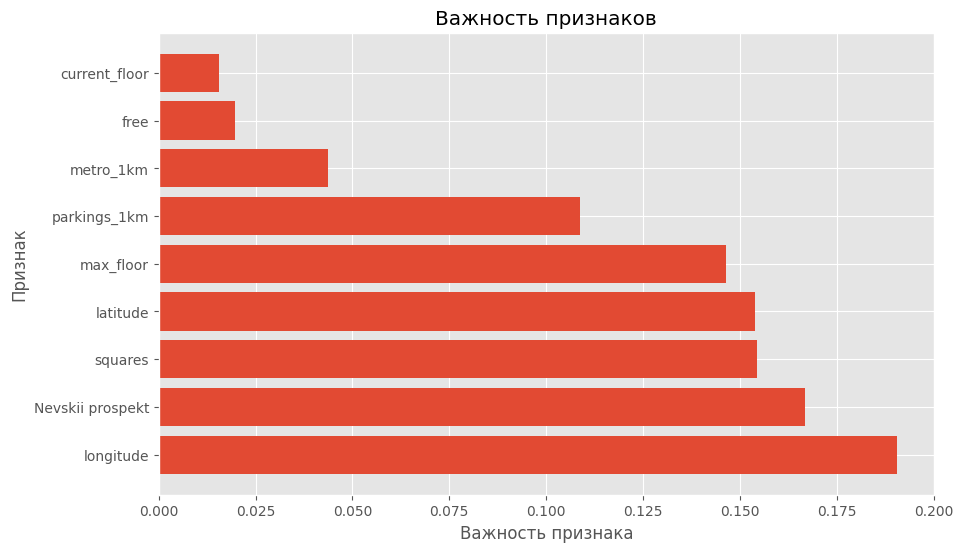

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances['importance'])
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Важность признаков')
plt.show()

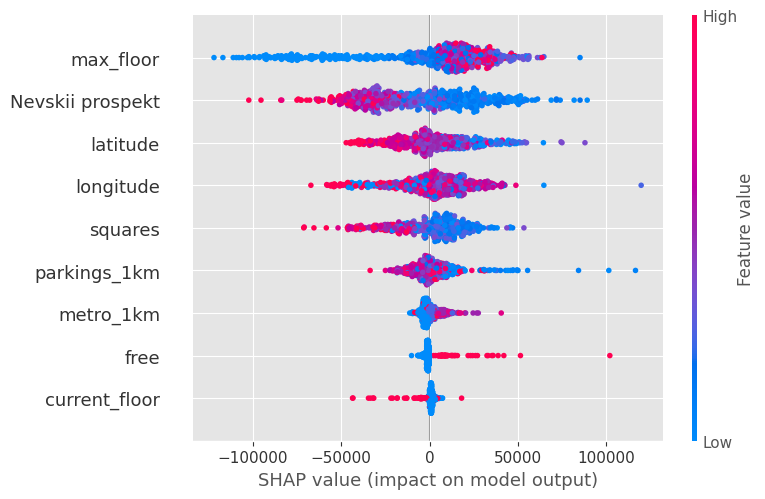

In [61]:
import shap

explainer = shap.Explainer(rfc1)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)